# Model Klasifikasi Gambar
Tahapan :
   1. Memastikan tensorflow yang digunakan di Watson Studio dan Google Colab adalah versi di atas 2.0.
   2. Unduh dataset dan extract file dengan metode unzip.
   3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
   4. Pre-processing data dengan image augmentation.
   5. Mempersiapkan data latih yang akan dipelajari oleh model.
   6. Membangun arsitektur model dengan CNN.
   7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
   8. Prediksi gambar ruangan bersih dan ruangan rapi untuk mengetes model.

In [2]:
''' Memastikan bahwa versi TensorFlow yang Anda gunakan adalah versi 2 ke atas. '''

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
''' Jika bukan bersi 2 ke atas, lakukan update '''

#Install pip package di kernel Jupyter notebook saat ini
 
import sys
!{sys.executable} -m pip install tensorflow==2.3.0 #versi tensorflow yang diinginkan bisa disesuaikan di baris ini

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 320.4 MB 67 kB/s /s eta 0:00:01
     |████████████████████████████████| 26.1 MB 31.8 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 47.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 22.3 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: s

    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


Restart kernel notebook Anda di Watson Studio dengan cara arahkan kursor ke menu Kernel, klik, lalu pilih Restart

In [3]:
''' Pilih Insert to Code -> Credentials '''

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-68c1cf51-c9ef-4081-a8b3-2eed1dacac27',
    'IBM_API_KEY_ID': 'dDuT9Y7UtbO9-WmawNyBuALgL4gYUI6T2MuRzIvMcRxJ',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'latihanwatsonstudio-donotdelete-pr-o35aesrtn21y0t',
    'FILE': 'messy-vs-clean-room_(Klasifikasi-Gambar).zip'
}


In [4]:
''' Persiapan untuk download file datasets tadi '''

import ibm_boto3
from ibm_botocore.client import Config
 
cos = ibm_boto3.client(service_name='s3',
                         ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                         ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                         ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
                         config=Config(signature_version='oauth'),
                         endpoint_url=credentials_1['ENDPOINT'])

In [5]:
''' Download file datasets tadi '''

cos.download_file(Bucket=credentials_1['BUCKET'],Key='messy-vs-clean-room_(Klasifikasi-Gambar).zip',Filename="messy_vs_clean_room_(Klasifikasi-Gambar).zip")

In [6]:
''' Periksa apakah file datasets sudah ada '''

import os
 
os.listdir()

['1.png',
 'images',
 '.virtual_documents',
 'messy_vs_clean_room_(Klasifikasi-Gambar).zip']

In [7]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'messy_vs_clean_room_(Klasifikasi-Gambar).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()
 
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
''' Periksa direktori data latih (training) terdapat sub-direktori 'messy' dan 'clean' '''

os.listdir('images/train')

['messy', 'clean']

In [9]:
''' Periksa direktori data validasi (test) terdapat sub-direktori 'messy' dan 'clean' '''

os.listdir('images/val')

['messy', 'clean']

In [10]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [11]:
''' 
- Membuat sebuah objek ImageDataGenerator untuk data training dan data testing
- Fitur yang disediakan Image data generator adalah, preprocessing data, 
  pelabelan sampel otomatis, dan augmentasi gambar.
- Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset
- Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada
- Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
''' 
Menggunakan objek image data generator sebelumnya untuk mempersiapkan 
data latih yang akan dipelajari oleh model 
'''

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
''' 
- Membangun arsitektur sebuah CNN 
- Terdapat 2 lapis layer konvolusi dan max pooling
- Layer konvolusi adalah untuk mengekstraksi atribut pada gambar
- Layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat
'''

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
''' Memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer '''

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [15]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 13s - loss: 0.7176 - accuracy: 0.5200 - val_loss: 0.6763 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 12s - loss: 0.7016 - accuracy: 0.5500 - val_loss: 0.6843 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 12s - loss: 0.6654 - accuracy: 0.6200 - val_loss: 0.5806 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 12s - loss: 0.6062 - accuracy: 0.6900 - val_loss: 0.5118 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 11s - loss: 0.5680 - accuracy: 0.7300 - val_loss: 0.6738 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 11s - loss: 0.6434 - accuracy: 0.6400 - val_loss: 0.5775 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 11s - loss: 0.5862 - accuracy: 0.6400 - val_loss: 0.4982 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 11s - loss: 0.5504 - accuracy: 0.7600 - val_loss: 0.3841 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 12s - loss: 0.6012 - accuracy: 0.6900 - val_loss: 0.5325 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 11s - loss: 0.4844 - accuracy: 0.8100 - val_loss: 0.5126 - val_accuracy: 0.7000
Epoch 11/

In [16]:
cos.download_file(Bucket=credentials_1['BUCKET'],Key='1.png',Filename="1.png")

In [17]:
''' install keras (sudah) '''
# pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


1.png
messy


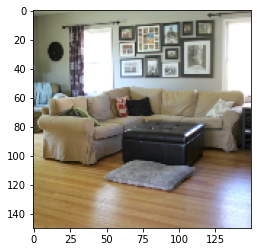

In [17]:
''' Melakukan resize pada berkas gambar yang kita pilih dan mengubahnya menjadi larik numpy '''

import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# change it to your filename
fn = '1.png'
 
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(fn)
if classes==0:
  print('clean')
else:
  print('messy')